Machine Learning Flowchart

es.co.in/wp-content/uploads/2020/06/machinelearning-algorithm-processing-flowchart-1024x865.jpg

In [1]:
!git clone https://github.com/codeforcauseorg/ML-Bootcamp-July

Cloning into 'ML-Bootcamp-July'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 222 (delta 12), reused 24 (delta 5), pack-reused 189
Receiving objects: 100% (222/222), 119.10 MiB | 25.80 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Checking out files: 100% (131/131), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
data = np.load("/content/ML-Bootcamp-July/knn/datasets/mnist_train_small.npy")


In [ ]:
X = data[:, 1:]
y = data[:, 0]


In [ ]:
X.shape, y.shape

((19999, 784), (19999,))

In [ ]:
#[5, 0, 0, ..., 0, 0, 0]
# the first column is y and the remaining 784 columns represent x
# Documentation of mnist dataset -> Read out


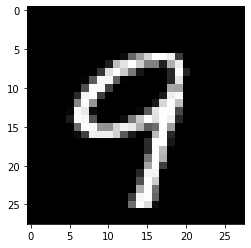

In [ ]:
plt.imshow(X[78].reshape(28, 28), cmap = 'gray')

In [ ]:
y[78]

9

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((13399, 784), (13399,))

In [ ]:
X_test.shape, y_test.shape

((6600, 784), (6600,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()


In [ ]:
# training the model happens in fit function
# plotting these points on the graph
# In KNN no work is happening in training the model 
# All computations happens when we provide the test data
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
model.predict(X_test[:20])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2, 0, 6, 1, 9, 9, 4, 9, 1, 6, 2],
      dtype=uint8)

In [ ]:
y_test[:20]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2, 0, 6, 1, 9, 9, 4, 9, 1, 6, 2],
      dtype=uint8)

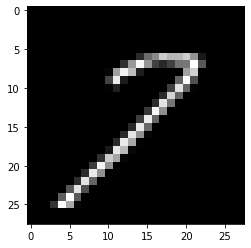

In [ ]:
plt.imshow(X_test[0].reshape(28, 28), cmap="gray")

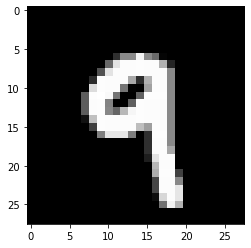

In [ ]:
plt.imshow(X_test[3].reshape(28, 28), cmap="gray")

In [ ]:
model.score(X_test[:100], y_test[:100])

0.95

# Custom KNN - My own KNN implementation from scratch


In [ ]:
class CustomKNN:
  #constructor
  def __init__(self, n_neighbors=5):
    self.n_neighbors = n_neighbors

  # training function
  def fit(self, X, y):
    self._X = X.astype(np.int64)
    self._y = y

  # predict point
  # given a single point, tell me which class it belongs to
  def predict_point(self, point):
    # storing the dis of given 'point' from each point in training data
    list_dist = []

    #these point are from the training database 
    for x_point, y_point in zip(self._X, self._y):
      dist_point = ((point - x_point)**2).sum()
      list_dist.append([dist_point, y_point])

    # sorting the list according to the distance
    sorted_dist = sorted(list_dist)
    top_k_nearest = sorted_dist[:self.n_neighbors]

    # taking the count
    items, count = np.unique(np.array(top_k_nearest)[:, 1], return_counts=True)
    ans = items[np.argmax(count)]
    return ans

  #predict
  # give an answer for each number in the array
  def predict(self, X):
    results = []
    for point in X:
      results.append(self.predict_point(point))
    return np.array(results, dtype=int)

  # Score to measure accuracy
  def score(self, X, y):
    return sum(self.predict(X) == y)/ len(y)

In [ ]:
model2 = CustomKNN()

In [ ]:
model2.fit(X_train, y_train)

In [ ]:
model2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [ ]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [ ]:
model2.score(X_test[:100], y_test[:100])

In [ ]:
# For calculating distance of new points from other points
(np.array([4, 5, 6])-np.array([3, 4, 5])).sum()